In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
dbSp = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/CoronaVirus/SpaCovid-19.csv")
dbSp

,covid1,covid2,covid3,covid4,covid5,covid6,Y
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,2
4,1,1,1,1,1,2,2
5,1,1,1,1,2,2,2
6,1,1,1,2,2,2,2
7,1,1,2,2,2,2,2
8,1,2,2,2,2,2,2
9,2,2,2,2,2,2,2


In [5]:
log = lambda x: math.log2(x)
deslog = lambda x: 2**x
module = lambda x: (x**2)**(1/2)
ysp=dbSp["Y"];
ysp=ysp.apply(log)
Xsp=dbSp.drop('Y', axis=1)
Xsp=Xsp.applymap(log)
X_trainsp, X_testsp, y_trainsp, y_testsp = train_test_split(Xsp, ysp, test_size = 0.2, random_state = 0)
VetorMSElog = []
VetorMSEdeslog = []
VetorVarlog = []
VetorVardeslog= []
menor_erro = 0
for l in range(1,11):
    #print("Training MLPRegressor number ",l )
    #6,8,6
    reg = MLPRegressor(hidden_layer_sizes =(50, 50, 50, 50, 50, 50, 50, 50, 50, 50),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
    reg.fit(X_trainsp,y_trainsp)
    
    y_predict_trainsp = reg.predict(X_trainsp)
    y_predict_testsp= reg.predict(X_testsp)
    
    VetorMSElog.append(mean_squared_error(y_testsp, y_predict_testsp))
    VetorVarlog.append(explained_variance_score(y_testsp, y_predict_testsp))
    
    VetorMSEdeslog.append(mean_squared_error(deslog(y_testsp), deslog(y_predict_testsp)))
    VetorVardeslog.append(explained_variance_score(deslog(y_testsp),deslog(y_predict_testsp)))
     
    if(menor_erro == 0 | (module(menor_erro) > module(mean_squared_error(y_testsp, y_predict_testsp)))):
        menor_erro = mean_squared_error(y_testsp, y_predict_testsp)
        menor_errodeslog = mean_squared_error(deslog(y_testsp), deslog(y_predict_testsp))
        
        Var_menor_erro = explained_variance_score(y_testsp, y_predict_testsp, sample_weight=None, multioutput='uniform_average')
        Var_menor_erro_deslog =explained_variance_score(deslog(y_testsp),deslog(y_predict_testsp), sample_weight=None, multioutput='uniform_average')
        
        bestReg = reg
        
        Y_menor_erro_test = y_predict_testsp
        Y_menor_erro_train = y_predict_trainsp

                         train
Mean squared error: 14.47
Variance score: 0.92


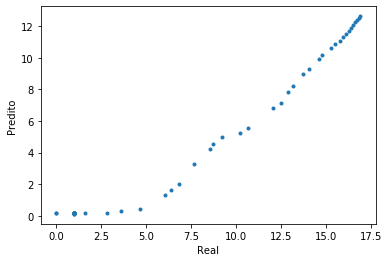

In [6]:
print("                         train")
y_trainsp= (y_trainsp)
y_predict_trainsp= (Y_menor_erro_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_trainsp, y_predict_trainsp))
print('Variance score: %.2f' % explained_variance_score(y_trainsp, y_predict_trainsp,sample_weight=None, multioutput='uniform_average'))
plt.scatter(y_trainsp,y_predict_trainsp,marker='.')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.show()

                         test
Best Mean squared error: 15.34
Mean of MSE: 141.36
Variance score: 0.86
Mean of Variance -0.65


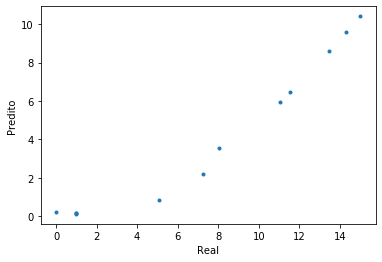

In [7]:
print("                         test")
y_testsp= (y_testsp)
y_predictsp= (Y_menor_erro_test)
print("Best Mean squared error: %.2f"
      % mean_squared_error(y_testsp, y_predictsp))
print("Mean of MSE: %.2f" % statistics.mean(VetorMSElog))
print('Variance score: %.2f' % explained_variance_score(y_testsp, y_predictsp))
print("Mean of Variance %.2f" % statistics.mean(VetorVarlog))
plt.scatter(y_testsp,y_predictsp,marker='.')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.show()

                         train
Mean squared error: 1798239455.14
Variance score: 0.09


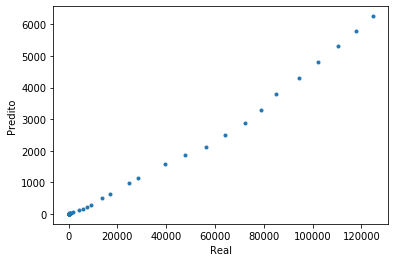

In [8]:
print("                         train")
y_trainsp= deslog(y_trainsp)
y_predict_trainsp= deslog(Y_menor_erro_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_trainsp, y_predict_trainsp))
print('Variance score: %.2f' % explained_variance_score(y_trainsp, y_predict_trainsp,sample_weight=None, multioutput='uniform_average'))
plt.scatter(y_trainsp,y_predict_trainsp,marker='.')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.show()

                         test
Best Mean squared error: 125484476.70
Mean of MSE: 99152588322914341941673984.00
Variance score: 0.08
Mean of Variance -866790134297194112.00


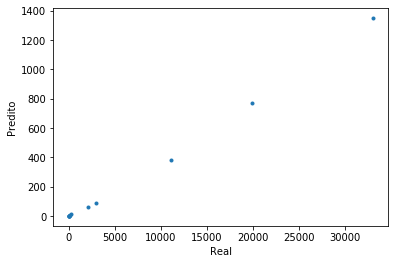

In [9]:
print("                         test")
y_testsp= deslog(y_testsp)
y_predictsp= deslog(Y_menor_erro_test)
print("Best Mean squared error: %.2f"
      % mean_squared_error(y_testsp, y_predictsp))
print("Mean of MSE: %.2f" % statistics.mean(VetorMSEdeslog))
print('Variance score: %.2f' % explained_variance_score(y_testsp, y_predictsp))
print("Mean of Variance %.2f" % statistics.mean(VetorVardeslog))
plt.scatter(y_testsp,y_predictsp,marker='.')
plt.xlabel('Real')
plt.ylabel('Predito')
plt.show()

In [10]:
dbBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/CoronaVirus/Covid-19.csv")
xBr = dbBr.drop('Y', axis=1)
xBr= xBr.applymap(log)
yBr = dbBr['Y']
yBr= yBr.apply(log)

                   Prediction Brazil
Mean squared error: 6724375.81
Variance score: -977.40


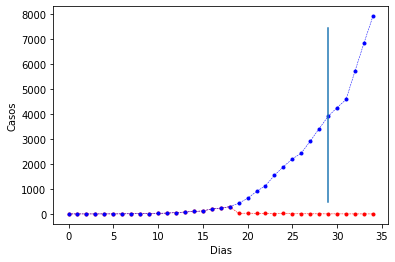

In [11]:
for i in range(0,16):
    linha = xBr.loc[(13+i)]
    Ypred = bestReg.predict([linha])
    xBr.at[(14+i),'cases6']=Ypred
    xBr.at[(15+i),'cases5']=Ypred
    xBr.at[(16+i),'cases4']=Ypred
    xBr.at[(17+i),'cases3']=Ypred
    xBr.at[(18+i),'cases2']=Ypred
    xBr.at[(19+i),'cases1']=Ypred
xBr = xBr.applymap(deslog)
lista1 = []
lista2 = []
for i in range(0,35):
    if(i<35):
        lista1.append(i)
    lista2.append(i)
CovidBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019//CoronaVirus/covid-19UmaColuna.csv")
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.plot(lista1,xBr['cases1'],linestyle='--', color='r', marker='.', linewidth=0.5)
plt.plot(lista2,CovidBr['cases'],linestyle='--', color='b', marker='.', linewidth=0.5)
plt.axvline(x=29, ymin=0.1, ymax=0.9) #inicio da quarentena no brasil
print("                   Prediction Brazil")

print("Mean squared error: %.2f"
      % mean_squared_error(xBr['cases1'], CovidBr['cases']))
print('Variance score: %.2f' % explained_variance_score(xBr['cases1'], CovidBr['cases'], sample_weight=None, multioutput='uniform_average'))


                   Prediction Spain
Mean squared error: 445454996.43
Variance score: -280601264132.39


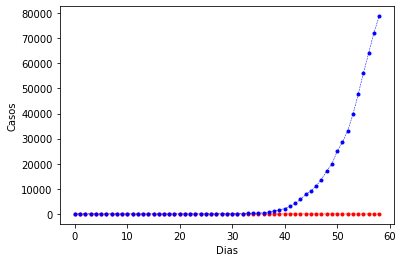

In [12]:
# prever dados da espanha # avisar que "trapaciei"
DadosSp=dbSp.drop('Y',axis=1)
DadosSp= DadosSp.loc[0:25]
DadosSp = DadosSp.applymap(log)
for i in range(2,58):
    linha = DadosSp.loc[i]
    Ypred = bestReg.predict([linha])
    DadosSp.at[(1+i),'covid6']=Ypred
    DadosSp.at[(1+i),'covid5']=DadosSp.loc[i,['covid6']]
    DadosSp.at[(1+i),'covid4']=DadosSp.loc[i,['covid5']]
    DadosSp.at[(1+i),'covid3']=DadosSp.loc[i,['covid4']]
    DadosSp.at[(1+i),'covid2']=DadosSp.loc[i,['covid3']]
    DadosSp.at[(1+i),'covid1']=DadosSp.loc[i,['covid2']]
DadosSp = DadosSp.applymap(deslog) 
lista3 =[]
for i in range(0,59):
    lista3.append(i)
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.plot(lista3,DadosSp['covid1'],linestyle='--', color='r', marker='.', linewidth=0.5)
plt.plot(lista3,dbSp['covid1'],linestyle='--', color='b', marker='.', linewidth=0.5)
print("                   Prediction Spain")
print("Mean squared error: %.2f"
      % mean_squared_error(DadosSp['covid1'], dbSp['covid1']))
print('Variance score: %.2f' % explained_variance_score(DadosSp['covid1'], dbSp['covid1'], sample_weight=None, multioutput='uniform_average'))
# comparar com dados 
# 20 50 100 neuronios, 3 5 e 10 camadas

In [ ]:
VetorMSEdeslog

In [ ]:
VetorMSElog

In [ ]:
VetorVardeslog

In [ ]:
VetorVarlog

In [ ]:
print('Variance score: %.2f' % explained_variance_score(DadosSp['covid1'], dbSp['covid1'], sample_weight=None, multioutput='uniform_average'))